# Question 5

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
#load data
df_p = pd.read_csv('./Data/penguins.csv')
df_p.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0


### part a

In [3]:
#assign color to each type of penguins
palette = {'Adelie': 'red', 'Chinstrap': 'blue', 'Gentoo': 'green'}

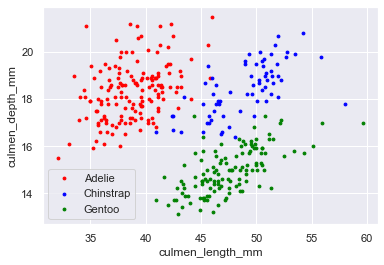

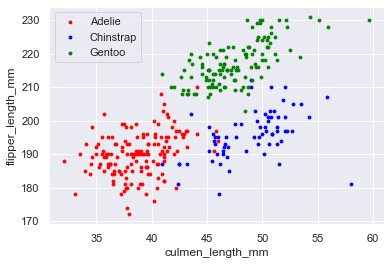

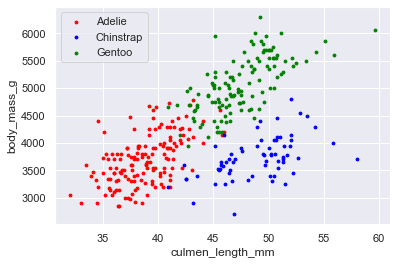

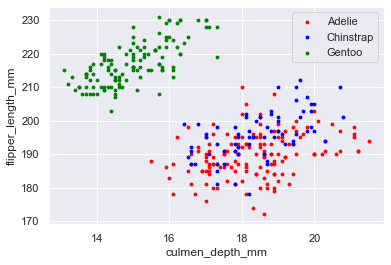

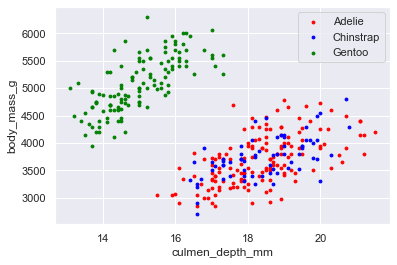

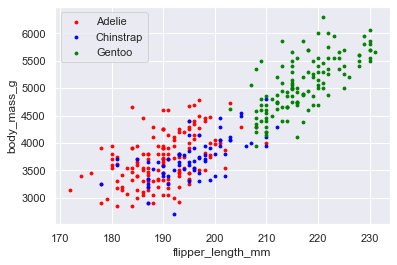

In [4]:
#plot scatterplot of each pairs of features
features = df_p.columns[1:]

#to iterate between unique pairs of features, first loop goes throw all features and second loop goes throw of next features from previous loop
for i, x in enumerate(features):
    for y in features[i+1:]:
        
        #iterate throw palette we defined before to plot samples with seperate color for each class
        for t, c in palette.items():
            plt.scatter(df_p[df_p["species"]==t][x], df_p[df_p["species"]==t][y], c=c, label=t, s = 8)
        
        #setting labels
        plt.xlabel(x)
        plt.ylabel(y)
        
        #setting legend
        plt.legend()
        
        #showing plot
        plt.show()

##### showing distribution of different classes using histogram of each feature

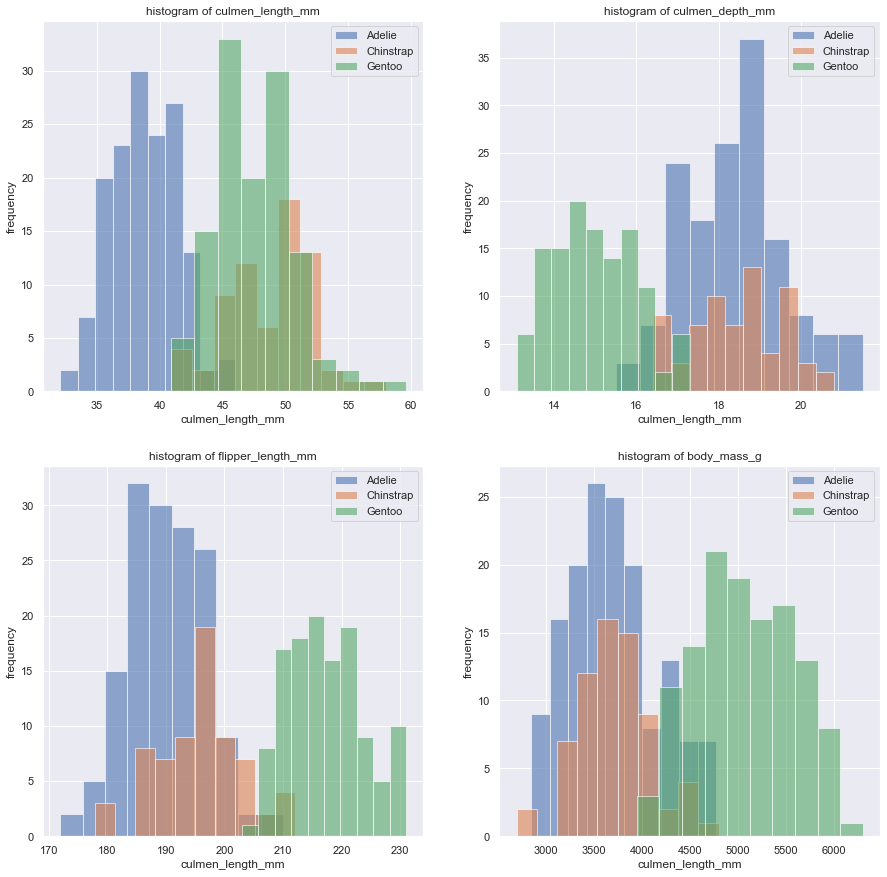

In [5]:
plt.figure(figsize=(15, 15))

#plot histogram for each feature
for i, x in enumerate(features):
    plt.subplot(2,2,i + 1)
    
    #to show distribution of different classes in a histogram, iterate throw palette which contains different classes and then plot seperated histogram for each class
    for t, c in palette.items():
        plt.hist(df_p[df_p["species"]==t][x].reset_index(drop=True), alpha=0.6, label=t)
        
    #setting title, labels, legend
    plt.title(f"histogram of {x}")
    plt.xlabel("culmen_length_mm")
    plt.ylabel("frequency")
    plt.legend()
    
#showing plot
plt.show()

### part b

In [6]:
import numpy as np 
from numpy import log,dot,exp,shape

def standardize(X_tr):
    '''
    standardize X_train for each column seperately, using vectorization technique
    '''
    for i in range(shape(X_tr)[1]):
        X_tr[:,i] = (X_tr[:,i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])

class LogisticRegression:
    def sigmoid(self,z):
        '''
        Compute the sigmoid of z
        '''
        sig = 1/(1+np.exp(-z))
        return sig
    
    def initialize(self,X):
        '''
        initialize weights by zero
        add bias to X
        '''
        weights = np.zeros((shape(X)[1]+1,1))
        X = np.c_[np.ones((shape(X)[0],1)),X]
        return weights,X
    
    def fit(self,X,y,alpha=0.001,iter=400):
        '''
        fitting training data   
        '''
        weights,X = self.initialize(X)
        
        def cost(theta):
            '''
            calculate cost for theta
            '''
            z = dot(X,theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            cost = -((cost1 + cost0))/len(y)
            return cost
        
        cost_list = np.zeros(iter,)
        for i in range(iter):
            '''
            gradient descent for updating weights
            '''
            y_prob = self.sigmoid(X @ weights)
            err = y_prob - np.array(y).reshape((len(y),1))
            grad = X.T @ err 
            
            weights = weights - alpha*grad
            cost_list[i] = cost(weights)
            
        self.weights = weights
        return cost_list
    
    def probability(self,X):
        '''
        claculate th probability of being class 1.
        '''
        z = dot(self.initialize(X)[1],self.weights)
        lis = []
        for i in self.sigmoid(z):
            lis.append(i[0])
        return lis

In [7]:
from numpy.random import default_rng
import math

# drop NaN data
df_p = df_p.dropna()

#reset index
df_p.reset_index(drop=True, inplace = True)

#size of sample
n = df_p.shape[0]


#choose 80% of data for training
train_size = math.floor(0.8 * n)

#choose unique index randomely to choose that data as train data
rng = default_rng()
numbers = rng.choice(n, size=train_size, replace=False)

#setting training data
train = df_p.loc[numbers]
X_train = train[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y_train = train[['species']]

#extract remaining data and set them as test data
all_index = np.arange(n)
test_index = np.delete(all_index, numbers)
test = df_p.loc[test_index]
X_test = test[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y_test = test[['species']]

In [8]:
#preparing for define 3 models for every class
y_tr1 = y_train["species"].map({"Adelie": 1, "Gentoo": 0, "Chinstrap": 0})
y_tr2 = y_train["species"].map({"Adelie": 0, "Gentoo": 1, "Chinstrap": 0})
y_tr3 = y_train["species"].map({"Adelie": 0, "Gentoo": 0, "Chinstrap": 1})

#standardize X_train and X_test
standardize(X_train.values)
standardize(X_test.values)

obj1 = LogisticRegression()
model1 = obj1.fit(X_train,y_tr1)

obj2 = LogisticRegression()
model2 = obj2.fit(X_train,y_tr2)

obj3 = LogisticRegression()
model3 = obj3.fit(X_train,y_tr3)


y_pred1 = obj1.probability(X_test)
y_pred2 = obj2.probability(X_test)
y_pred3 = obj3.probability(X_test)

#compare probability of each class and choose the maximum probability
y_pred = []
for i in range(len(y_test)):
    y_pred.append(np.argmax([y_pred1[i], y_pred2[i], y_pred3[i]]))

# preparing for calculating metrics
y_test = y_test['species'].map({"Adelie": 0, "Gentoo":1, "Chinstrap":2})
y_test = y_test.reset_index(drop = True)
y_pred = pd.DataFrame(y_pred)[0]

#claculating confusion matrix
confusion_mtx =  [[0]*3 for i in range(3)]
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        confusion_mtx[y_pred[i]][y_test[i]] +=1
    else:
        confusion_mtx[y_test[i]][y_pred[i]] +=1
confusion_mtx = np.array(confusion_mtx)     
confusion_mtx

array([[32,  0,  0],
       [ 0, 23,  0],
       [ 1,  0, 13]])

In [9]:
# Recall = TruePositives / (TruePositives + FalseNegatives)
# Precision = TruePositives / (TruePositives + FalsePositives)
# Jaccard = tp / (tp + fp + fn)
# f1_score = 2.(Precision * Recall) / (Precision + Recall)
T0=confusion_mtx[0][0]
T1=confusion_mtx[1][1]
T2=confusion_mtx[2][2]

FN0=confusion_mtx[0][1]+confusion_mtx[0][2]
FN1=confusion_mtx[1][0]+confusion_mtx[1][2]
FN2=confusion_mtx[2][0]+confusion_mtx[2][1]

FP0=confusion_mtx[1][0]+confusion_mtx[2][0]
FP1=confusion_mtx[0][1]+confusion_mtx[2][1]
FP2=confusion_mtx[0][2]+confusion_mtx[1][2]

accuracy = (T0 + T1 + T2) / len(y_test)
recall = [T0/(T0 + FN0), T1/(T1 + FN1), T2/(T2 + FN2)]
precision = [T0/(T0 + FP0), T1/(T1 + FP1), T2/(T2 + FP2)]
jaccard = [T0/(T0+FP0+FN0), T1/(T1+FP1+FN1), T2/(T2+FP2+FN2)]
f1 = [2*(p * r) / (p + r) for p, r in zip(precision, recall)]

print(f"accuracy = {accuracy}")
print(f"recall = {recall}")
print(f"precision = {precision}")
print(f"jaccard = {jaccard}")
print(f"f1_score = {f1}")

accuracy = 0.9855072463768116
recall = [1.0, 1.0, 0.9285714285714286]
precision = [0.9696969696969697, 1.0, 1.0]
jaccard = [0.9696969696969697, 1.0, 0.9285714285714286]
f1_score = [0.9846153846153847, 1.0, 0.962962962962963]


### part c

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn import linear_model
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [11]:
X = df_p[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g']]
y = df_p['species']
y = y.map({"Adelie": 0, "Gentoo":1, "Chinstrap":2})

y = lb.fit_transform(y)
n_classes = y.shape[1]

random_state = np.random.RandomState(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

classifier = OneVsRestClassifier(
    LogisticRegression(solver='liblinear', random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

y_pred = classifier.predict(X_test)

<AxesSubplot:>

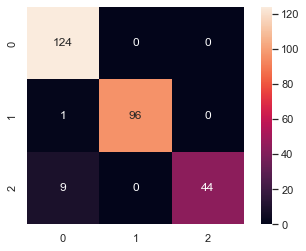

In [12]:
y_test_original = lb.inverse_transform(y_test)
y_pred_original = lb.inverse_transform(y_pred)

confusion_mtx = confusion_matrix(y_test_original, y_pred_original)
sns.heatmap(confusion_mtx, square=True, annot=True, fmt='d', cbar=True)

In [13]:
accuracy = accuracy_score(y_test_original, y_pred_original)
recall = recall_score(y_test_original, y_pred_original, average=None)
precision = precision_score(y_test_original, y_pred_original, average=None)
jaccard = jaccard_score(y_test_original, y_pred_original, average=None)
f1 = f1_score(y_test_original, y_pred_original, average=None)

print(f"accuracy = {accuracy}")
print(f"recall = {recall}")
print(f"precision = {precision}")
print(f"jaccard = {jaccard}")
print(f"f1_score = {f1}")

accuracy = 0.9635036496350365
recall = [1.         0.98969072 0.83018868]
precision = [0.92537313 1.         1.        ]
jaccard = [0.92537313 0.98969072 0.83018868]
f1_score = [0.96124031 0.99481865 0.90721649]


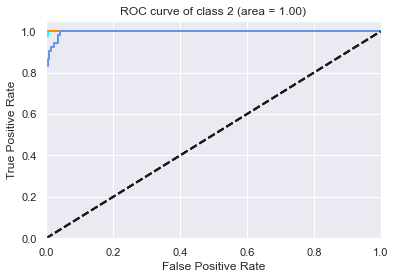

In [14]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )
    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]))
plt.show()
